# Atividade 1
## Desenvolvimento de um Classificador Binário por Limiar

Juliano Kendyi Shinohara

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

#### Importar dataset .csv

In [36]:
df = pd.read_csv("iris_2class.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


Agrupamento entre caracteristicas do csv, afim de visualizar os dados manualmente.

In [37]:
df.groupby("especie").describe()["sepal length (cm)"]

,count,mean,std,min,25%,50%,75%,max
especie,,,,,,,,
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [38]:
df.groupby("especie").describe()["sepal width (cm)"]

,count,mean,std,min,25%,50%,75%,max
especie,,,,,,,,
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [39]:
df.groupby("especie").describe()["petal length (cm)"]

,count,mean,std,min,25%,50%,75%,max
especie,,,,,,,,
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [40]:
df.groupby("especie").describe()["petal width (cm)"]

,count,mean,std,min,25%,50%,75%,max
especie,,,,,,,,
versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


#### PLOTS

Realizar análises através dos 4 atributos afim de averiguar quail possui menor colisão.

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

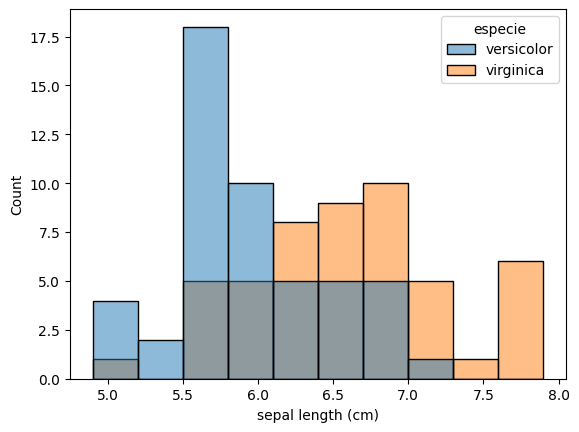

In [41]:
sns.histplot(data = df, bins=10, x = "sepal length (cm)", hue = "especie")

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

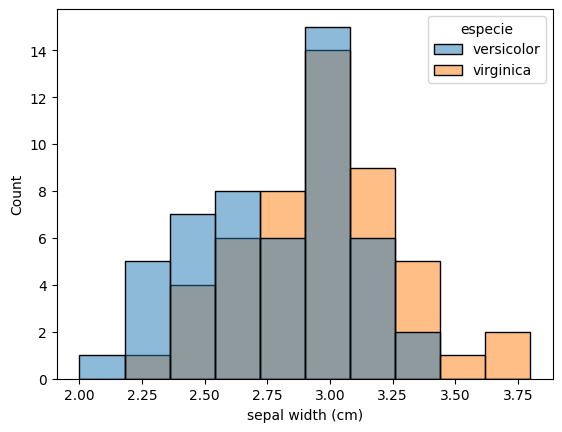

In [42]:
sns.histplot(data = df, bins=10, x = "sepal width (cm)", hue = "especie")

<Axes: xlabel='petal length (cm)', ylabel='Count'>

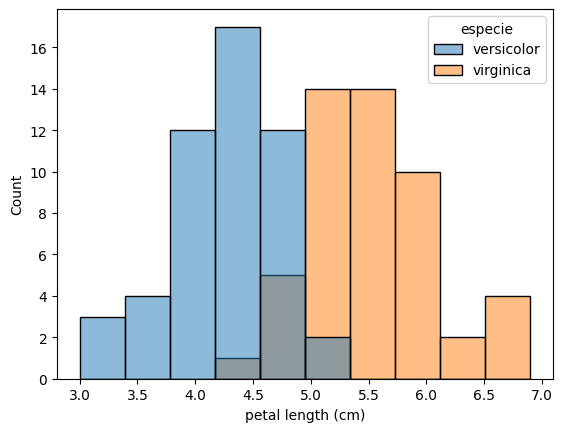

In [43]:
sns.histplot(data = df, bins=10, x = "petal length (cm)", hue = "especie")

<Axes: xlabel='petal width (cm)', ylabel='Count'>

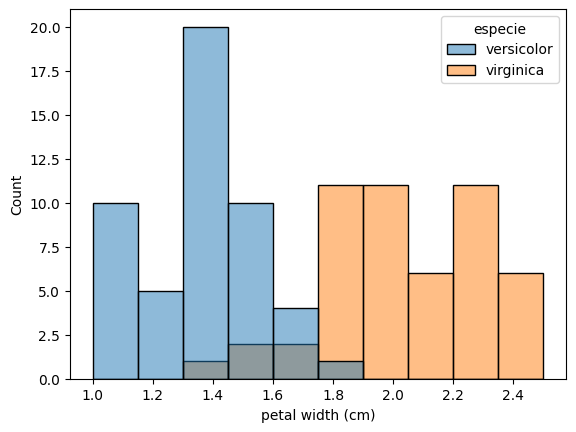

In [44]:
sns.histplot(data = df, bins=10, x = "petal width (cm)", hue = "especie")

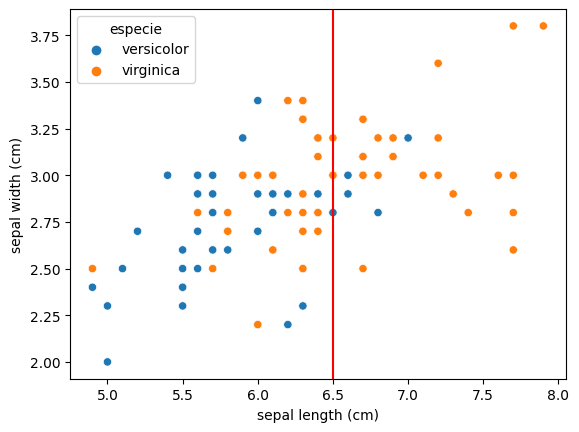

In [45]:
sns.scatterplot(data = df, x = "sepal length (cm)", y = "sepal width (cm)", hue = "especie")
plt.axvline(6.50, color = "red", label = "limiar")

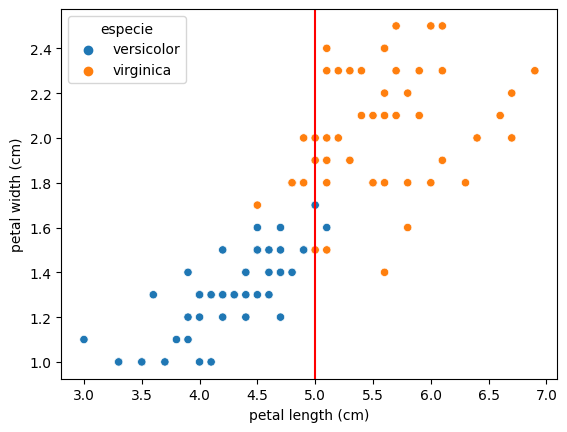

In [46]:
sns.scatterplot(data = df, x = "petal length (cm)", y = "petal width (cm)", hue = "especie")
plt.axvline(5.0, color = "red", label = "limiar")

#### Divisão de treino e teste

A largura da pétala é a qual possui a menor colisão entre os demais atributos, sendo ela utilizada para a divisão dos dados para treino e teste.

In [47]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df[["petal width (cm)"]], df["especie"], test_size = 0.2, stratify = df["especie"])

#### Classificador por Limiar

Um algoritmo que classifica amostras em diferentes categorias com base em um valor de limiar predefinido. O valor de limiar é definido durante o treinamento do modelo e é usado para determinar a qual classe uma nova amostra pertence.

In [48]:
def classificador_limiar(limiar, data, column, labels = ["versicolor", "virginica"]):
  predictions = []
  for idx, data in data.iterrows():
    if data[column] < limiar:
      predictions.append(labels[0])
    else:
      predictions.append(labels[1])
  return predictions

#### Busca exaustiva

Algoritmo responsável por averiguar o melhor resultado do classificador por limiar de acordo com a quantidade de limiares informado.

In [61]:
def busca_exaustiva_class_limiar(n_limiares, x_treino, y_treino, column):

    limiares = np.linspace(df[column].min(), df[column].max(), n_limiares)
    accuracys = []

    melhorLimiar = limiares[0]
    melhorAccuracy = 0

    for limiar in limiares:
        prepredictions = classificador_limiar(limiar, x_treino, column)
        accuracy = accuracy_score(y_treino, prepredictions)
        accuracys.append(accuracy)

        if accuracy > melhorAccuracy:
            melhorAccuracy = accuracy
            melhorLimiar = limiar

    return melhorLimiar, melhorAccuracy

#### Treino do Classificador

Responsável por chamar a função de busca exaustiva informando a coluna que será utilizada para avaliar e o limiar obtido.

In [66]:
limiar, acc = busca_exaustiva_class_limiar(20, x_treino, y_treino, "petal width (cm)")
print("Acurácia do treino: %.2f \nLimiar: %.2f" % (acc, limiar))

Acurácia do treino: 0.95 
Limiar: 1.55


### Classificador de teste

Após ser realizado os treinos, é realizado os testes afim de  afim de obter a melhor acuracia para o desenvolvimento.

In [68]:
prediction = classificador_limiar(limiar, x_teste, "petal width (cm)")
print("Acurácia no teste: %.2f" % (accuracy_score(y_teste, prediction)))

Acurácia no teste: 0.80
